In [1]:
import scanpy as sc
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp"
input_path    = f"{path}/data/local.h5ad"

In [4]:
adata = sc.read_h5ad(input_path) 

In [5]:
adata = adata[(adata.obs["disease"] != "normal") & (adata.obs["disease"] != "chronic obstructive pulmonary disease")] #exclude normal and COPD samples
adata = adata[adata.obs["tumor_stage"].notna()] #exclude samples without tumor stage
adata = adata[(adata.obs["sex"]=="male")| (adata.obs["sex"]=="female")]

In [6]:
adata = adata[(adata.obs["origin"]=="tumor_primary")| (adata.obs["origin"]=="normal_adjacent")]

In [7]:
#adata = adata[(adata.obs["disease"]!="non-small cell lung carcinoma")]

## Male/Female proportion LUAD vs LUSC 

In [8]:
aggregated_df = adata.obs.groupby('donor_id').agg({
    'sex': 'first',  # Assuming 'sex' is a categorical column and you want the first occurrence
    'age': 'first',  # Similarly, if there is an 'age' column or any other donor-specific info
        'disease': 'first',  # Similarly, if there is an 'age' column or any other donor-specific info
    'sample': 'count'  # Assuming there is a 'sample_id' column
}).reset_index()

# Rename the sample_id column to something more descriptive
aggregated_df.rename(columns={'sample': 'num_cells'}, inplace=True)


In [9]:
df_plot = aggregated_df.groupby(["sex","disease"]).count()

In [10]:
df_plot = df_plot.reset_index()

In [11]:
df_plot

,sex,disease,donor_id,age,num_cells
0,female,lung adenocarcinoma,55,52,55
1,female,squamous cell lung carcinoma,11,11,11
2,female,non-small cell lung carcinoma,4,2,4
3,male,lung adenocarcinoma,54,41,54
4,male,squamous cell lung carcinoma,33,33,33
5,male,non-small cell lung carcinoma,11,2,11


[Text(0.5, 0, ''), Text(0, 0.5, 'Number of patients')]

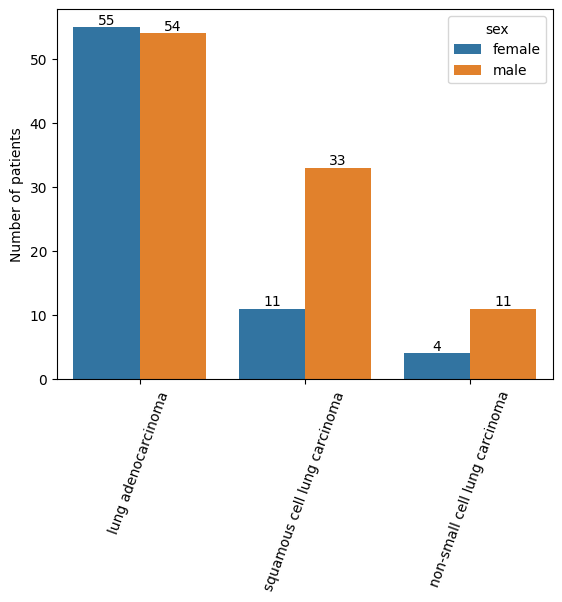

In [12]:
#Plotting by seaborn

ax = sns.barplot(x = "disease", y="donor_id",hue = "sex", data= df_plot)
plt.xticks(rotation=70)
#plt.tight_layout()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set(xlabel='', ylabel='Number of patients')

## Exclude NSCLC_mixed from cell_type_tumor

In [13]:
#adata = adata[(adata.obs["cell_type_tumor"]!="non-small cell lung carcinoma")]

In [15]:
adata.obs.cell_type_tumor.value_counts()

T cell CD4                         149343
Macrophage alveolar                 82844
Macrophage                          78660
T cell CD8 effector memory          62591
NK cell                             50094
B cell                              44307
Monocyte classical                  43364
Tumor cells LUAD                    36671
T cell regulatory                   33603
Plasma cell                         30292
T cell NK-like                      25119
transitional club/AT2               22894
cDC2                                20734
Neutrophils                         18706
T cell CD8 terminally exhausted     17601
Alveolar cell type 2                16274
Endothelial cell venous             15849
Tumor cells LUSC                    15395
Mast cell                           14361
Endothelial cell capillary          10870
T cell CD8 naive                    10207
Tumor cells LUSC mitotic             9359
Tumor cells LUAD EMT                 7800
Ciliated                          